# PCA & Clustering - Assignmnet

## Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
raw_data = pd.read_csv(r"C:\Users\sandeep kalyan\Desktop\upgrad\ML-1\PCA & Clustering - Assignment\Country-data.csv")

In [4]:
raw_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
print(raw_data.info(),raw_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None        child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
countries = raw_data.pop("country")
countries

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [8]:
raw_data.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
l=list(raw_data.columns)
l

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

## Scaling

In [10]:
scaler = StandardScaler()
scaled_data =  pd.DataFrame(scaler.fit_transform(raw_data),columns=l)
print(raw_data.head())
print(scaled_data.head())

   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200  
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668

In [23]:
scaled_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,2.383323e-16,5.218713e-16,2.871954e-16,-7.512288e-17,8.376533e-17,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-1.500192e+00,-1.827827e+00,-1.939940e+00,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-6.333367e-01,-6.922106e-01,-6.914785e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-2.235279e-01,-1.810007e-01,-1.487432e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,3.747198e-01,6.515412e-01,4.913530e-01,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,5.813835e+00,4.047436e+00,5.266181e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


## Visualization

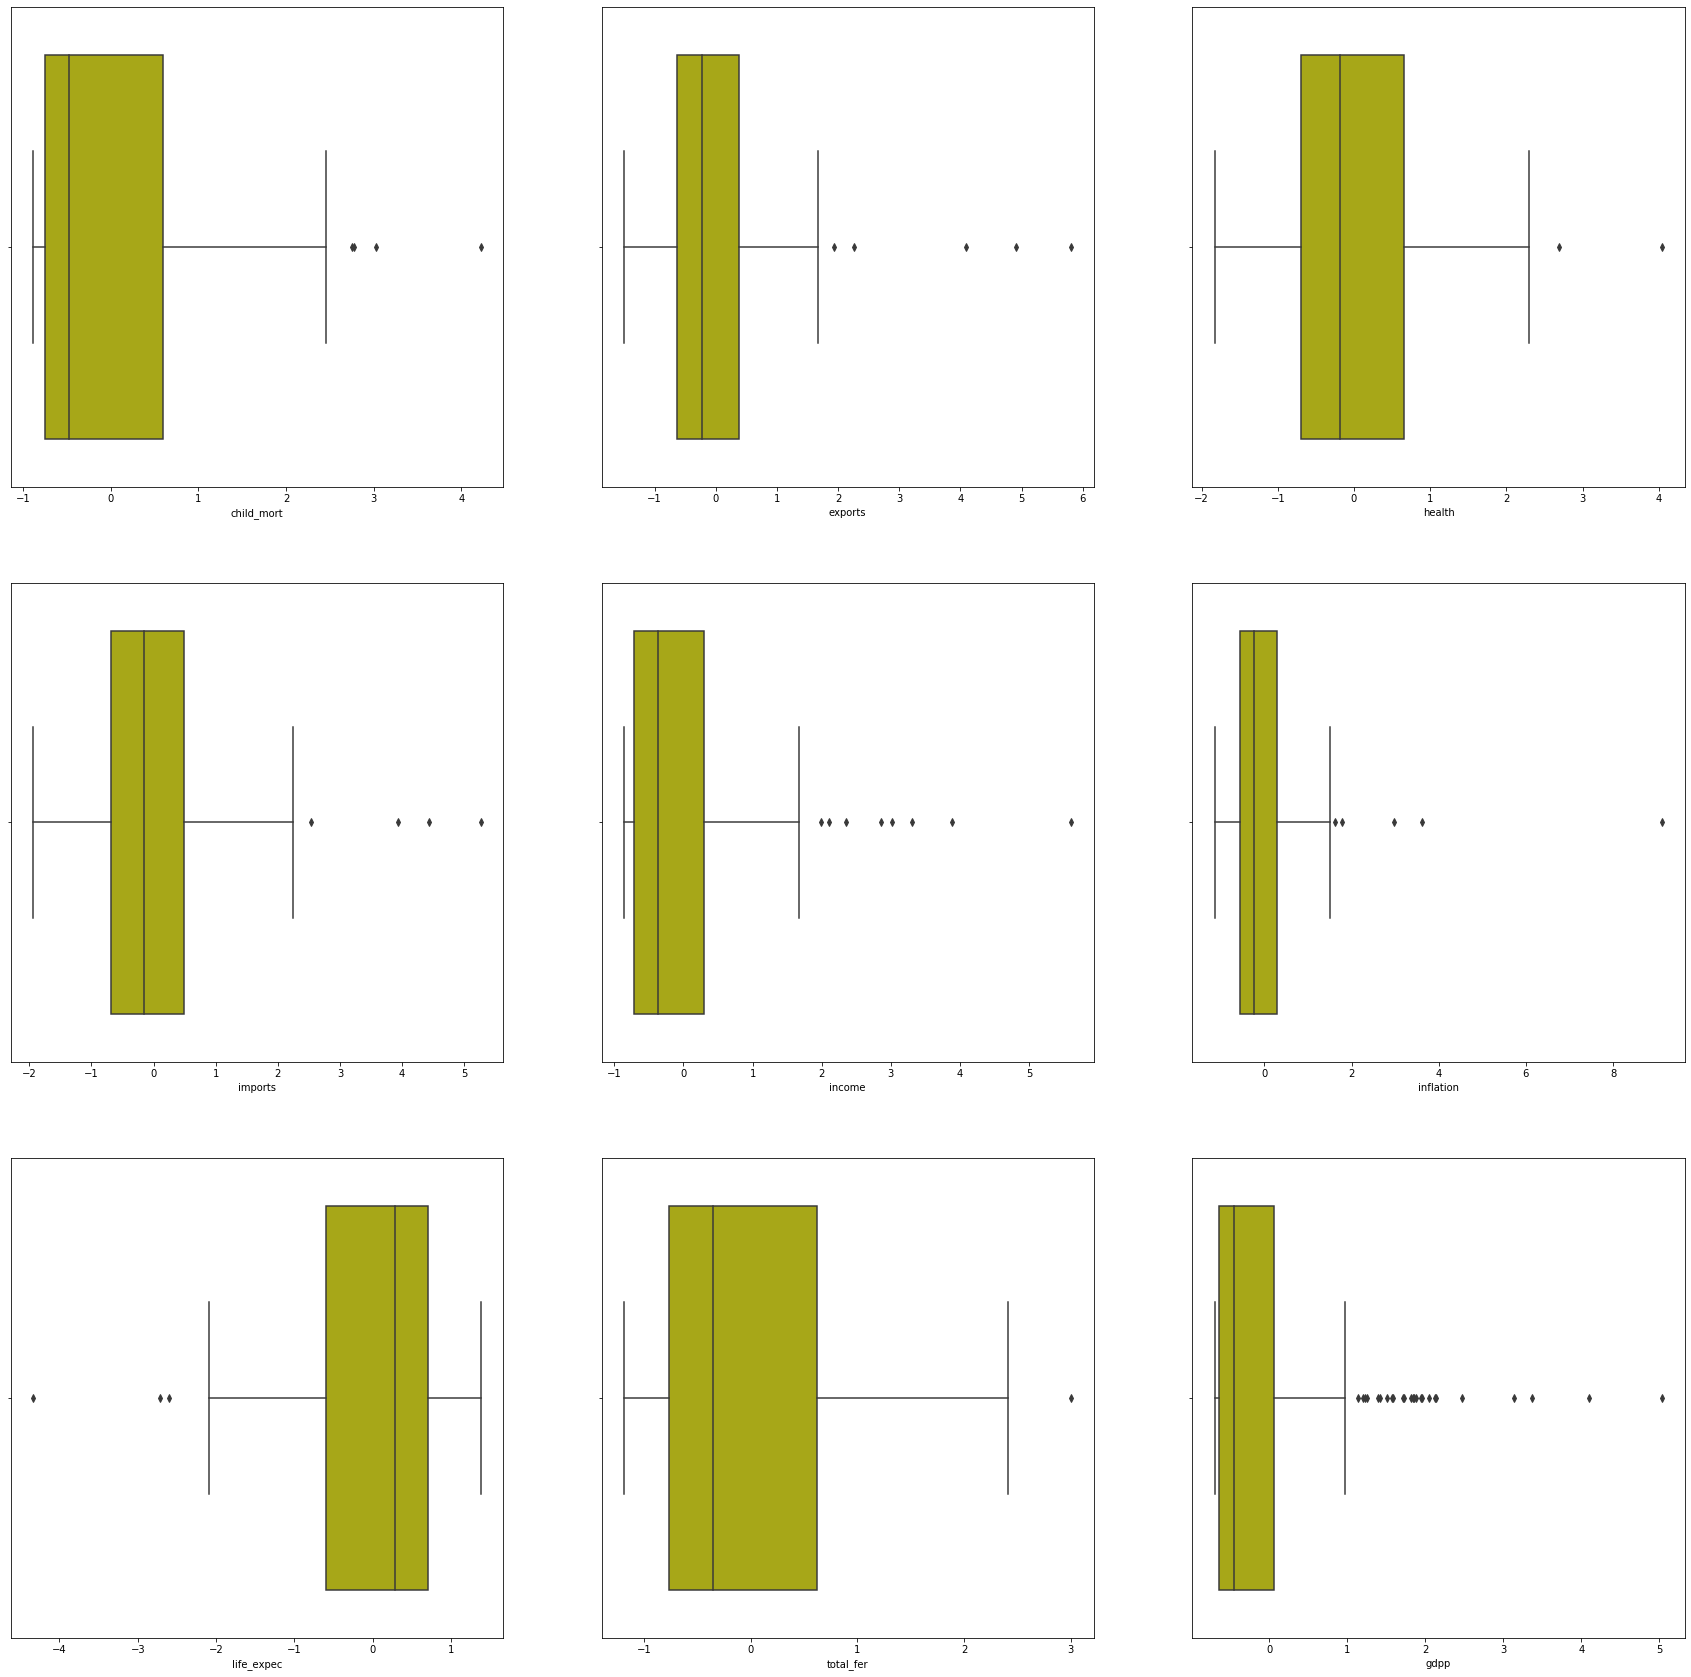

In [33]:
plt.figure(figsize=(30,30))
k=1
for i in l:
    plt.subplot(3,3,k)
    sns.boxplot(x=i,data = scaled_data,color="y")
    k=k+1

In [45]:
scaled_data.to_excel("Outlier_viz.xlsx")

## Data cleaning

In [47]:
Q1 = scaled_data.quantile(0.25)
Q3 = scaled_data.quantile(0.75)
IQR = Q3-Q1
IQR

child_mort    1.339286
exports       1.008057
health        1.343752
imports       1.182832
income        1.011693
inflation     0.848277
life_expec    1.297016
total_fer     1.381428
gdpp          0.696081
dtype: float64

In [57]:
cleaned_data = scaled_data[(scaled_data.income<=Q3.income+1.5*IQR.income)&(scaled_data.gdpp<=Q3.gdpp+1.5*IQR.gdpp)]
cleaned_data.shape

(142, 10)

In [ ]:
coun = cleaned_data.pop("countries")
cleaned_data=scaler.fit_transform(cleaned_data)

In [ ]:
cleaned_data=pd.DataFrame(cleaned_data)

In [ ]:
cleaned_data.columns=l
cleaned_data.head()

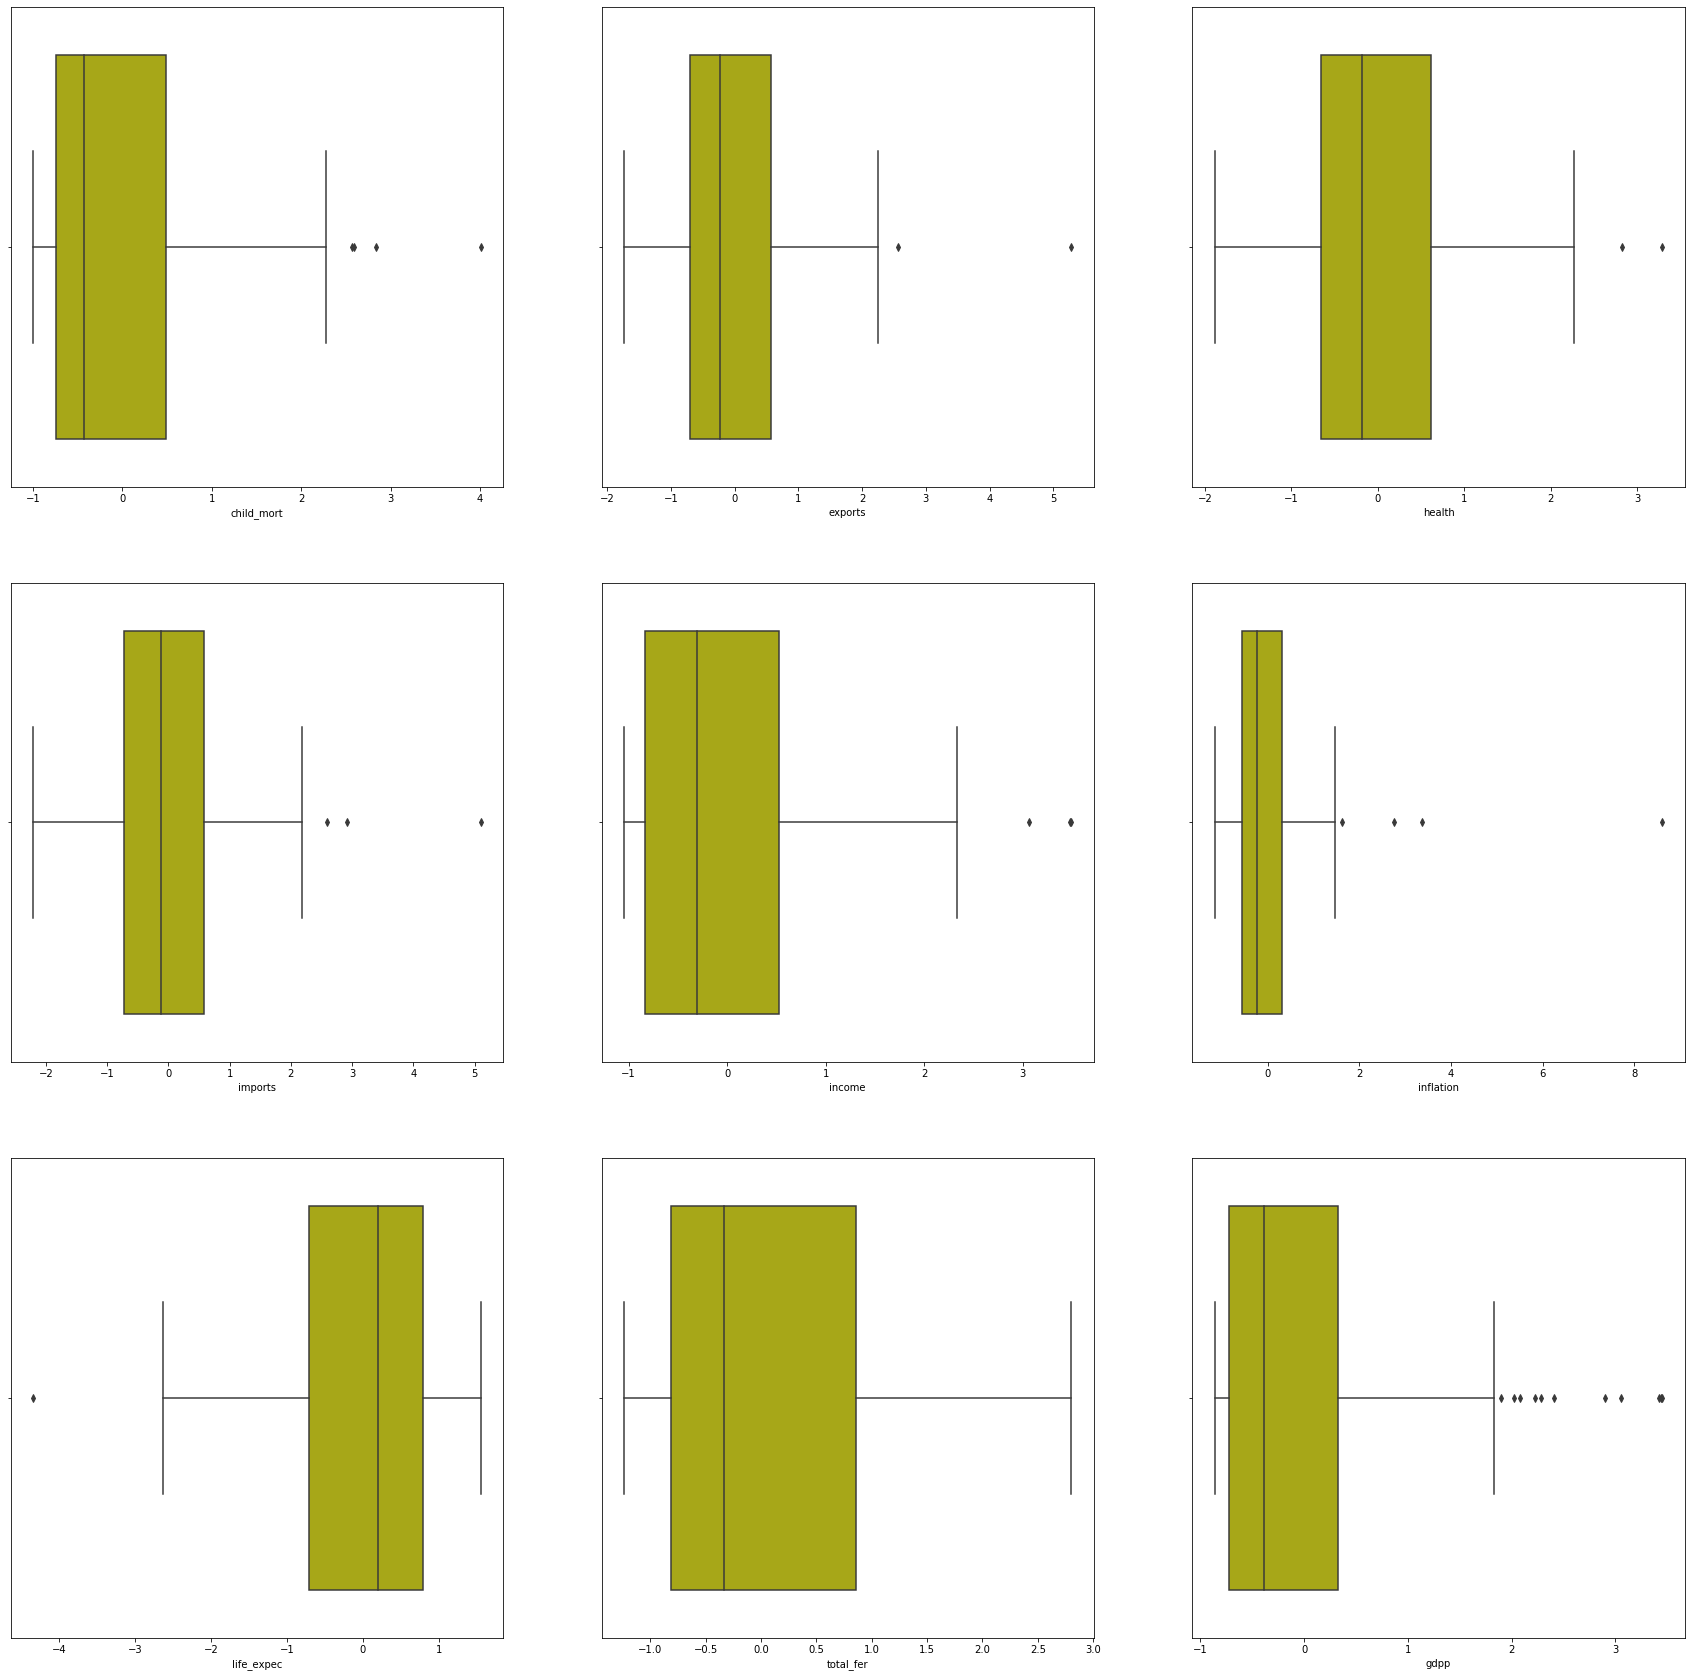

In [67]:
plt.figure(figsize=(30,30))
k=1
for i in l:
    plt.subplot(3,3,k)
    sns.boxplot(x=i,data = cleaned_data,color="y")
    k=k+1

In [162]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 9 columns):
child_mort    142 non-null float64
exports       142 non-null float64
health        142 non-null float64
imports       142 non-null float64
income        142 non-null float64
inflation     142 non-null float64
life_expec    142 non-null float64
total_fer     142 non-null float64
gdpp          142 non-null float64
dtypes: float64(9)
memory usage: 10.1 KB


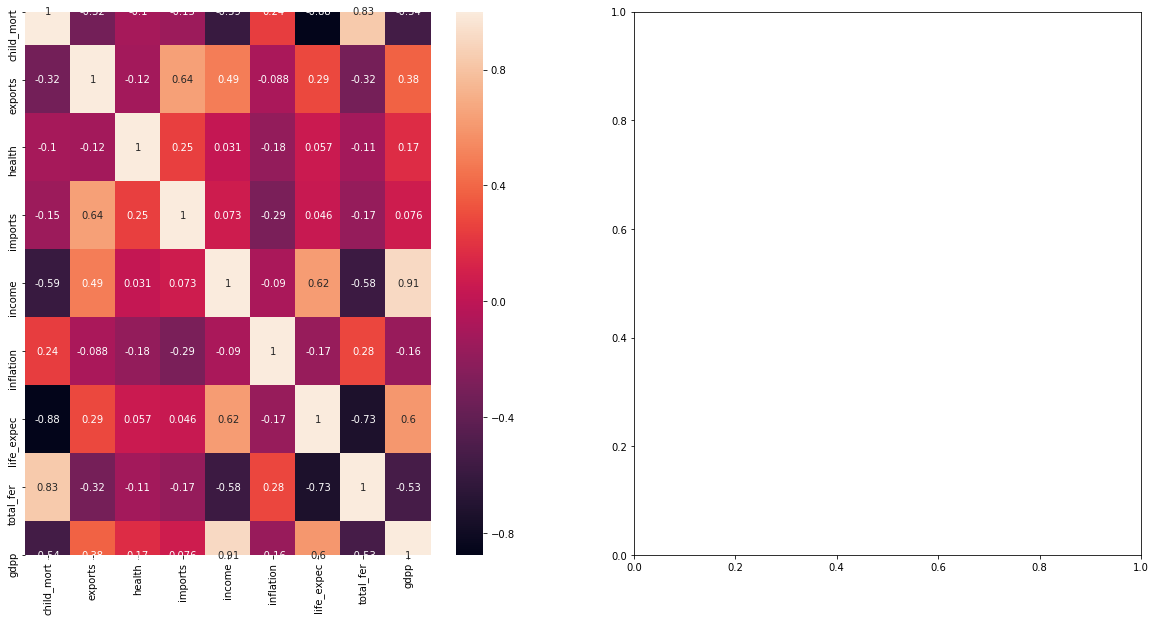

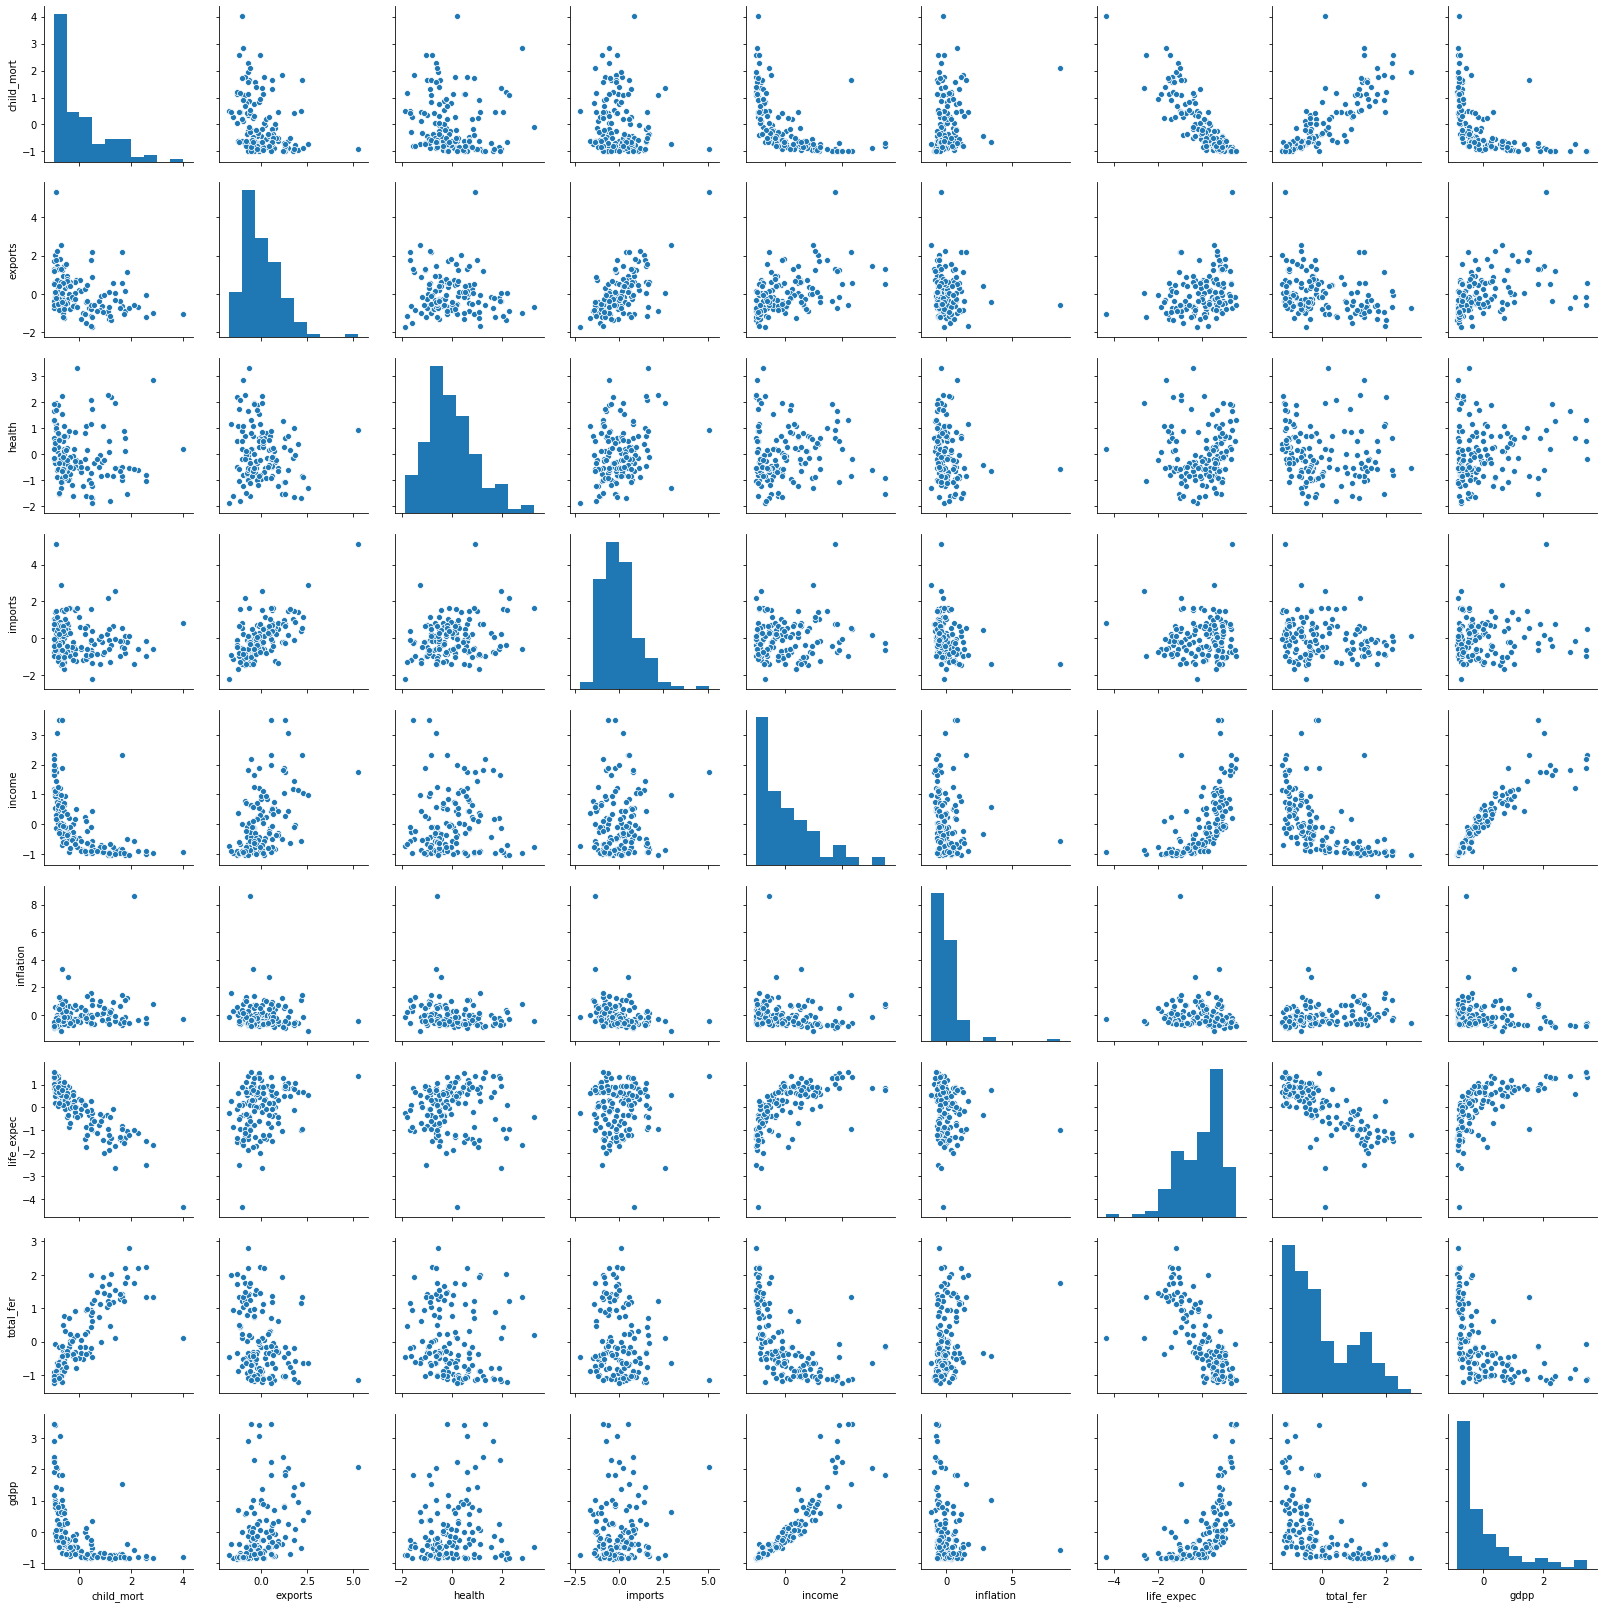

In [81]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.heatmap(cleaned_data.corr(),annot=True)

plt.subplot(1,2,2)
sns.pairplot(cleaned_data)


# PCA

In [82]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(random_state=42)

In [85]:
pca = pca.fit(cleaned_data)

In [89]:
pca.components_

array([[-0.43268279,  0.27511883,  0.07460737,  0.14799877,  0.41658057,
        -0.15457041,  0.42110943, -0.41680476,  0.40141573],
       [ 0.12705284,  0.41715275,  0.26439674,  0.72757198, -0.15165935,
        -0.34088789, -0.22222487,  0.07800451, -0.12609846],
       [ 0.14035908,  0.53942174, -0.63092374,  0.11593252,  0.20770985,
         0.44702842, -0.08811097,  0.15202484,  0.06297233],
       [ 0.2652956 ,  0.01131698,  0.59810059, -0.01482723,  0.33538809,
         0.41102888, -0.18304067,  0.25388186,  0.43835625],
       [-0.29344799,  0.03806039,  0.27002758,  0.21766343, -0.29577481,
         0.68124488,  0.22844879, -0.22152966, -0.373237  ],
       [ 0.15042134, -0.06059192, -0.03128897, -0.02627613,  0.10702339,
         0.08139198, -0.60766609, -0.76446833, -0.01685351],
       [ 0.02479168, -0.64964849, -0.30382792,  0.61240425,  0.02790418,
         0.13643725,  0.04904149,  0.02067456,  0.29625256],
       [ 0.74629402,  0.07540523,  0.01385579, -0.01324801, -0

In [91]:
pca.explained_variance_ratio_

array([0.45397868, 0.16710247, 0.13491987, 0.09975241, 0.07860391,
       0.02865835, 0.01877519, 0.01080293, 0.00740618])

In [93]:
cumm_variance = np.cumsum(pca.explained_variance_ratio_)

## Scree Plot

<BarContainer object of 9 artists>

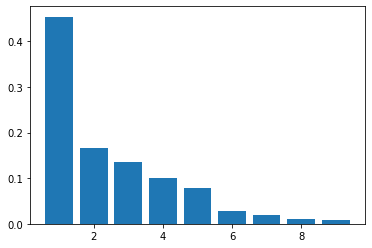

In [111]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)

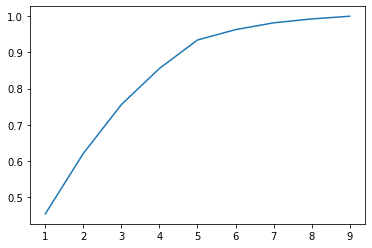

In [112]:
sns.lineplot(range(1,len(pca.explained_variance_ratio_)+1),cumm_variance)

## Taking the number of principal components for this dataset as 3 (K=3)

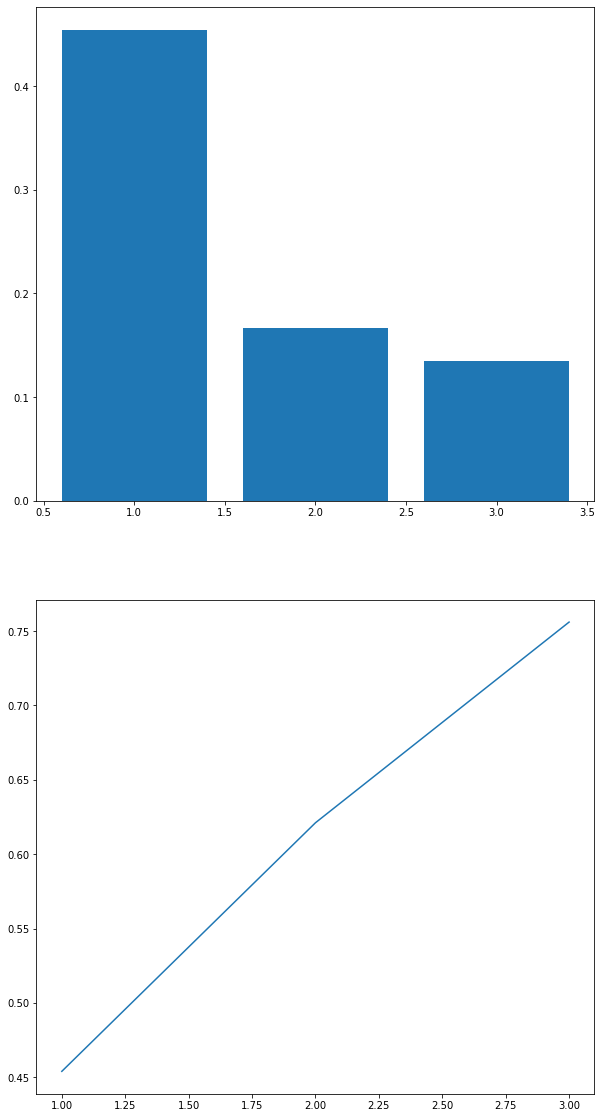

In [114]:
pc2 = PCA(n_components=3,random_state=42)
pc2.fit(cleaned_data)
cumm_variance_2 = np.cumsum(pc2.explained_variance_ratio_)
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
plt.bar(range(1,len(pc2.explained_variance_ratio_)+1),pc2.explained_variance_ratio_)
plt.subplot(2,1,2)
sns.lineplot(range(1,len(pc2.explained_variance_ratio_)+1),cumm_variance_2)

In [119]:
final_data = pd.DataFrame(pc2.fit_transform(cleaned_data),columns=["PC1","PC2","PC3"])
final_data.head()

,PC1,PC2,PC3
0,-2.897022,0.364168,-0.673747
1,0.847101,-0.283693,-0.796595
2,0.329733,-1.264075,0.693599
3,-2.432536,0.254102,2.607392
4,1.976024,0.149210,-0.004725


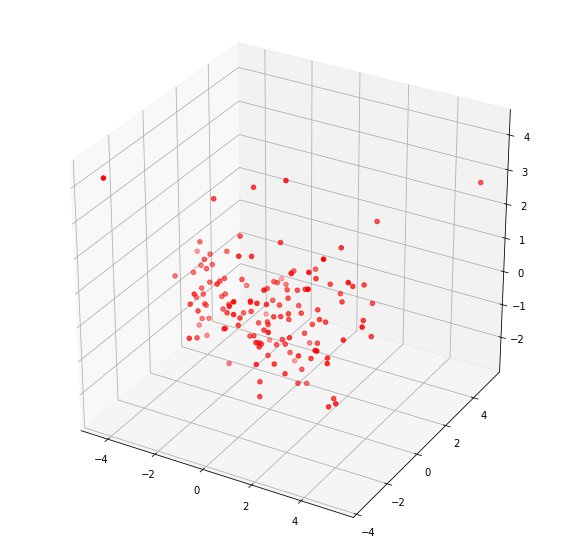

In [126]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(10,10)).add_subplot(111,projection = "3d")
ax.scatter(final_data["PC1"],final_data["PC2"],final_data["PC3"],c="r",marker="o")

## Cluster Modelling :


In [127]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

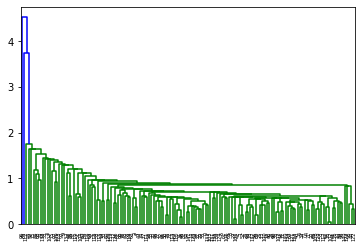

In [150]:
mergings = linkage(final_data,method="single",metric = "euclidean")
dendrogram(mergings)
plt.show()

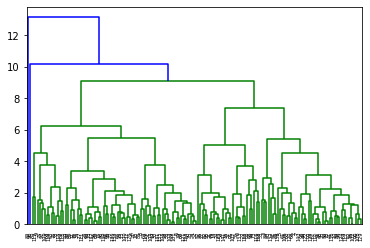

In [131]:
mergings = linkage(final_data,method="complete",metric = "euclidean")
dendrogram(mergings)
plt.show()

## Silhouette Analysis

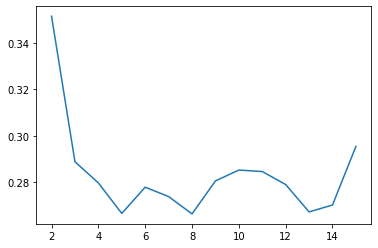

In [153]:
sil_list = []
for i in range(2,16):
    kmeans = KMeans(n_clusters= i ,max_iter=100)
    kmeans.fit(final_data)
    lab = kmeans.labels_
    sil_avg = silhouette_score(final_data,lab)
    sil_list.append(sil_avg)
sns.lineplot(x=range(2,16),y=sil_list)

### Here n=3,6 or 10 looks like the optimum number of clusters of let's go with n=6 analysing both silhouette graph and dendrogram.

In [154]:
kmeans = KMeans(n_clusters=6,random_state=42)
lab=kmeans.fit_predict(final_data)
lab.reshape(-1, )
lab

array([2, 1, 4, 2, 1, 4, 4, 4, 1, 3, 4, 1, 3, 0, 2, 0, 4, 1, 0, 1, 1, 2,
       2, 0, 2, 0, 2, 2, 1, 4, 4, 2, 2, 2, 1, 2, 1, 3, 3, 4, 4, 4, 4, 3,
       2, 3, 0, 4, 2, 0, 2, 1, 4, 4, 2, 2, 0, 2, 3, 4, 4, 4, 4, 1, 4, 0,
       4, 2, 0, 0, 2, 1, 1, 0, 0, 3, 3, 1, 2, 2, 3, 3, 2, 3, 2, 1, 0, 0,
       4, 1, 4, 2, 4, 0, 4, 2, 5, 3, 2, 3, 0, 4, 4, 1, 1, 1, 4, 2, 0, 3,
       2, 1, 3, 2, 3, 3, 0, 4, 1, 1, 4, 4, 2, 4, 2, 2, 3, 2, 2, 4, 1, 1,
       4, 2, 4, 1, 4, 0, 4, 0, 2, 2])

In [158]:
final_data["country"]=coun
final_data["Cluster_id"]=lab
final_data.head()

,PC1,PC2,PC3,country,Cluster_Id,Cluster_id
0,-2.897022,0.364168,-0.673747,Afghanistan,2,2
1,0.847101,-0.283693,-0.796595,Albania,1,1
2,0.329733,-1.264075,0.693599,Algeria,4,4
3,-2.432536,0.254102,2.607392,Angola,2,2
4,1.976024,0.149210,-0.004725,Antigua and Barbuda,1,1


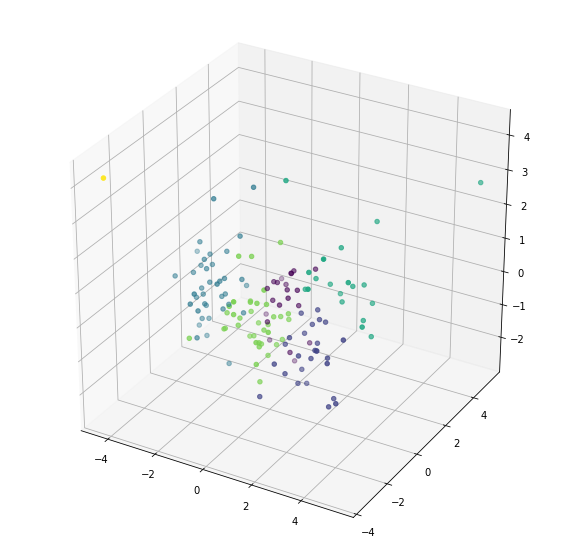

In [160]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(10,10)).add_subplot(111,projection = "3d")
ax.scatter(final_data["PC1"],final_data["PC2"],final_data["PC3"],c=final_data["Cluster_id"],marker="o")

In [184]:
cleaned_data["country"]=coun
cleaned_data["cluster_id"]=lab
cleaned_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,cluster_id
0,1.126990,-1.285264,0.489682,-0.080613,-0.945783,0.075885,-1.490007,1.725709,-0.816938,Afghanistan,2
1,-0.672778,-0.458149,0.053368,0.095009,-0.101991,-0.371124,0.885714,-0.968504,-0.317709,Albania,1
2,-0.411127,0.019740,-0.954812,-0.721394,0.199219,0.677314,0.909353,-0.167348,-0.265485,Algeria,4
3,1.831247,1.117964,-1.513971,-0.175543,-0.510703,1.246234,-1.029046,1.945381,-0.396750,Angola,2
4,-0.826834,0.345991,-0.166906,0.583901,0.828006,-0.646553,0.944811,-0.658379,0.826975,Antigua and Barbuda,1


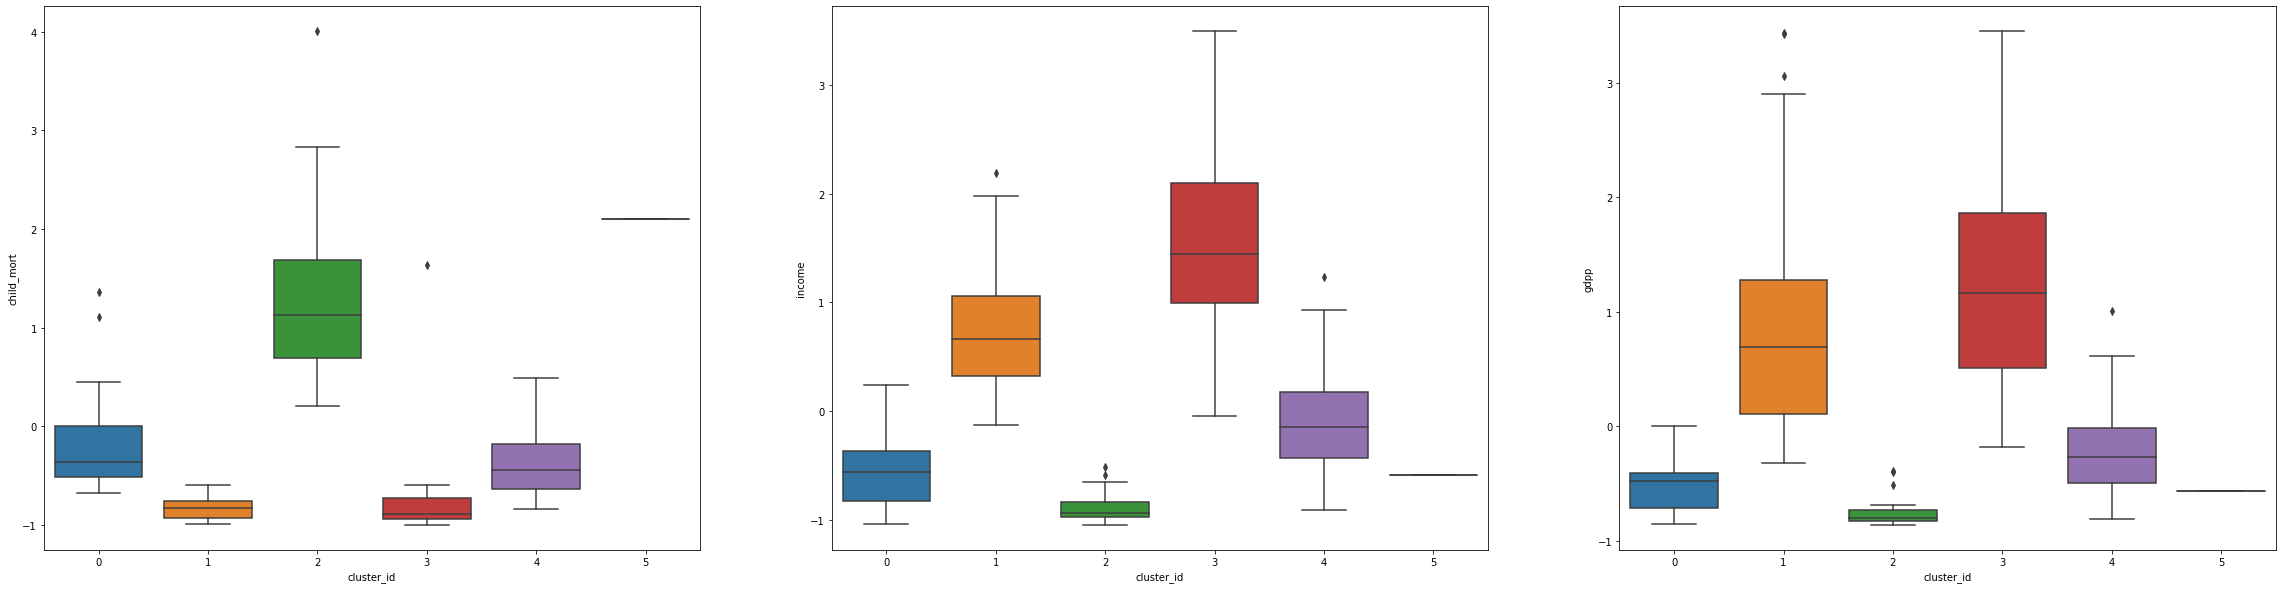

In [185]:
plt.figure(figsize=(40,10))
plt.subplot(1,3,1)
sns.boxplot(x="cluster_id",y="child_mort",data = cleaned_data)
plt.subplot(1,3,2)
sns.boxplot(x="cluster_id",y="income",data = cleaned_data)
plt.subplot(1,3,3)
sns.boxplot(x="cluster_id",y="gdpp",data = cleaned_data)
plt.show()

### Based on the viz's above the cluster with cluster_id = 2 has higher distribution of child_mortality rate, lower income and in turn lower GDP. So, I would take cluster (cluster_id=2) for further analysis. 

In [186]:
cleaned_data.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
country       0
cluster_id    0
dtype: int64

In [188]:
aid_df = cleaned_data[cleaned_data["cluster_id"]==2]
aid_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,1.280467,-0.553666,-0.195667,-0.331180,-0.890529,0.139181,-1.097164,1.331421,-0.759035,2.0
std,0.815991,0.748584,1.022303,0.547131,0.129587,0.653085,0.809817,0.602255,0.109693,0.0
min,0.202653,-1.643680,-1.789315,-1.395401,-1.047302,-0.696673,-4.338508,0.000637,-0.862386,2.0
25%,0.696611,-1.027939,-0.808669,-0.777166,-0.971137,-0.417405,-1.445684,0.995622,-0.824030,2.0
50%,1.131881,-0.710878,-0.493083,-0.325059,-0.932599,0.056469,-1.111783,1.328361,-0.795484,2.0
75%,1.690640,-0.311106,0.187863,-0.022468,-0.837013,0.629904,-0.573995,1.707941,-0.727734,2.0
max,4.007597,2.165643,2.827983,0.859200,-0.510703,1.616484,0.271100,2.804686,-0.386870,2.0


In [189]:
aid_df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
country       0
cluster_id    0
dtype: int64

In [202]:
final_aid_country=list(aid_df.sort_values(by=["child_mort"],ascending=False)["country"].head(10))

### The final list of counttries that need aid.

In [238]:
final_aid_country

['Haiti',
 'Sierra Leone',
 'Chad',
 'Central African Republic',
 'Mali',
 'Niger',
 'Angola',
 'Congo, Dem. Rep.',
 'Burkina Faso',
 'Guinea-Bissau']

## Vizualisation

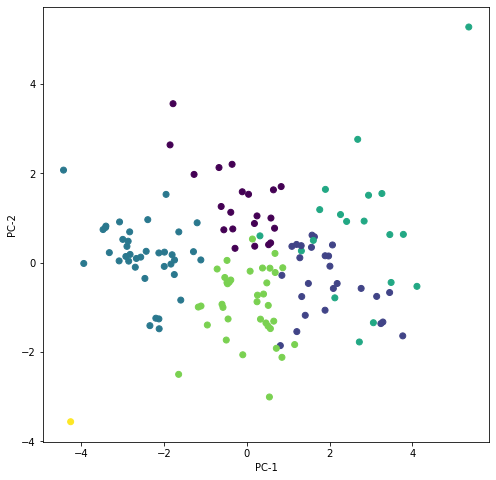

In [223]:
plt.figure(figsize=(8,8))
plt.scatter(final_data["PC1"],final_data["PC2"],c=final_data["Cluster_id"],label=set(final_data["Cluster_id"]))
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.show()

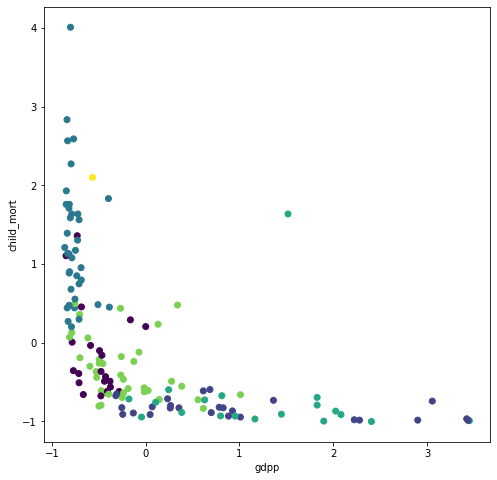

In [231]:
plt.figure(figsize=(8,8))
plt.scatter(cleaned_data["gdpp"],cleaned_data["child_mort"],c=cleaned_data["cluster_id"])
plt.xlabel("gdpp")
plt.ylabel("child_mort")
plt.show()

Text(0.5, 0, 'income')

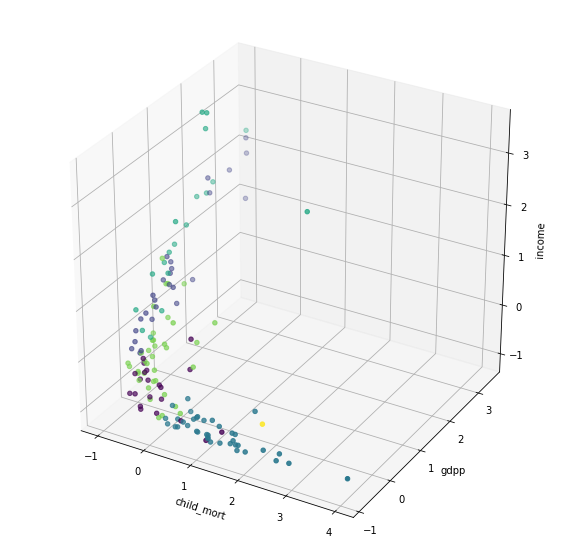

In [237]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(10,10)).add_subplot(111,projection = "3d")
ax.scatter(cleaned_data["child_mort"],cleaned_data["gdpp"],cleaned_data["income"],c=cleaned_data["cluster_id"],marker="o")

ax.xlabel("child_mort")
ax.set_ylabel("gdpp")
ax.set_zlabel("income")

In [ ]:
['Haiti',
 'Sierra Leone',
 'Chad',
 'Central African Republic',
 'Mali',
 'Niger',
 'Angola',
 'Congo, Dem. Rep.',
 'Burkina Faso',
 'Guinea-Bissau']